As a babycoder, I am trying to get used to learning what I need first to start coding, so first I need an environment then I need libraries.

In [12]:
#Importing neccessary libraries for Data Exploration for this assignment.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Creating a variable and dataframe
df = pd.read_csv("Worklife.csv")

In [ ]:
#Checking the first few rows of the dataset
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


I can see the 24 columns of information provided in this dataset.The next step will be to pick the useful ones for my case study. My primary and secondary users for the scope of my project are Employers and Employees and my aim is to find useful insight to detect burnouts.It would be interesting to see, age, gender, sleep hours, time for passion, daily stress and daily shouting because I gathered from my preliminary interviews that some of their frustrations related to these columns. It can maybe help me see some correlations later.(if any)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

This dataset has no missing values. :O

Now I would like to explore the following columns so that I can later see if there are any correlations.

*   DAILY_STRESS
*   SLEEP_HOURS
*   DAILY_SHOUTING
*   DAILY_STEPS
*   AGE
*   GENDER
*   TIME_FOR_PASSION
*   WORK_LIFE_BALANCE_SCORE




In [28]:
#Desribing specific columns

df[["DAILY_STRESS", "AGE", "DAILY_STEPS", "SLEEP_HOURS", "DAILY_SHOUTING", "GENDER", "TIME_FOR_PASSION",
"WORK_LIFE_BALANCE_SCORE"]].describe(include="all")

,DAILY_STRESS,AGE,DAILY_STEPS,SLEEP_HOURS,DAILY_SHOUTING,GENDER,TIME_FOR_PASSION,WORK_LIFE_BALANCE_SCORE
count,15971.000000,15972,15972.000000,15972.000000,15972.000000,15972,15972.000000,15972.000000
unique,NaN,4,NaN,NaN,NaN,2,NaN,NaN
top,NaN,21 to 35,NaN,NaN,NaN,Female,NaN,NaN
freq,NaN,6108,NaN,NaN,NaN,9858,NaN,NaN
mean,2.791685,NaN,5.703606,7.042888,2.930879,NaN,3.326572,666.751503
std,1.367801,NaN,2.891013,1.199044,2.676301,NaN,2.729293,45.019868
min,0.000000,NaN,1.000000,1.000000,0.000000,NaN,0.000000,480.000000
25%,2.000000,NaN,3.000000,6.000000,1.000000,NaN,1.000000,636.000000
50%,3.000000,NaN,5.000000,7.000000,2.000000,NaN,3.000000,667.700000
75%,4.000000,NaN,8.000000,8.000000,4.000000,NaN,5.000000,698.500000


It was not able to show all columns together because some were strings and others were floats, .describe(include="all") helps me see all the columns I requested regardless of type!

Note to self: NaN (Not a number) can indicate three potential causes in a dataset
* 1-There are missing values (e.g; someone didnt enter their sleep hours)
* 2-The operation doesn’t make sense	(e.g; Not possible to take the mean of “Male/Female”)
* 3-Data type mismatch (eg;Text stored in a numeric column)


Now, For the sake of pracitce I will chose one column to check for missing values.  .isna().sum() or .isnull().sum() (Both functions give same results)

In [29]:
#Finding missing values in a single column (as practice)
df["DAILY_SHOUTING"].isna().sum()
print(df["DAILY_SHOUTING"].isna().sum())

0


I was reading that duplicate entries can also affect the quality of data so just for the sake of practice I want to check if there are any and what to do with it further.So first I will check for duplicates then if any, I will remove them and then check again if they are removed.

In [30]:
#Checking for dulplicates
df.duplicated().sum()
#Removing duplicates
df = df.drop_duplicates()
#Checking if the duplicates have been removed
df.duplicated().sum()

np.int64(0)

Wow! 482 duplicates found. Interesting! Understanding that this can cause bias, it should be removed.

For the sake of practice I also want to convert some date type. If I can find any.

In [16]:
#Converting Data types

df["DAILY_STRESS"] = pd.to_numeric(df["DAILY_STRESS"], errors="coerce")
df["DAILY_STRESS"]

#Age should be a category
df["AGE"] = df["AGE"].astype("category")
df["AGE"]

#Gender should be a category
df["GENDER"] = df["GENDER"].astype("category")
df["GENDER"]

df[["AGE", "GENDER", "DAILY_STRESS"]].describe(include="all")


,AGE,GENDER,DAILY_STRESS
count,15972,15972,15971.000000
unique,4,2,NaN
top,21 to 35,Female,NaN
freq,6108,9858,NaN
mean,NaN,NaN,2.791685
std,NaN,NaN,1.367801
min,NaN,NaN,0.000000
25%,NaN,NaN,2.000000
50%,NaN,NaN,3.000000
75%,NaN,NaN,4.000000


In [17]:
#Counting missing and non missing values
df[["SLEEP_HOURS", "AGE", "DAILY_STRESS"]].isna().value_counts()

SLEEP_HOURS  AGE    DAILY_STRESS
False        False  False           15971
                    True                1
Name: count, dtype: int64

SO there is one missing value under Daily_stress, however i do not feel it would make a big difference so I will leave it as it is.

Now I would like to create some Data Visualizations.I will be making a basic linechart between columns for AGE vs TIME_FOR_PASSION.My reasearch is on people who work odd hours in retail and horeca which is why this was important to check , as  the age range idenified for a possible risk of burnout in these sectors is from 18-45 years. Most of my interviewees complained on lack of time for recreational or social activities due to odd hours and mismatch of timings with peers. For example they have to work on weekends, their friends dont.

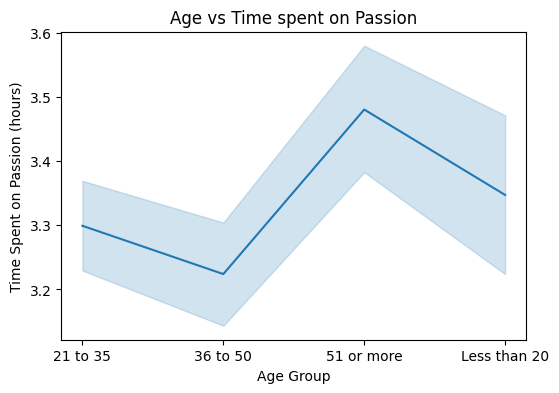

In [31]:
Worklife = df[["AGE", "TIME_FOR_PASSION"]]
plt.figure(figsize=(6, 4))
sns.lineplot(x='AGE', y='TIME_FOR_PASSION', data=Worklife)

plt.title('Age vs Time spent on Passion')
plt.xlabel('Age Group')
plt.ylabel('Time Spent on Passion (hours)')

plt.show()

So from this I can see that people above 50 have more time to spend on passion which comes back to the point that people who are likely to experience burnout are people below this age range.Escpecially the mid-life ones. Now I know why the term ' Mid-life crises exists'.

Next, I would like to see if there are any outliers which can be useful to help detect high risk cases of burnout. For example someone who isn't getting enough sleep might be at a higher risk.

I didnt know how to do the coding for it so I got some external help in understanding how to do it and what to detect in it to create a meaningful insight. This piece of code helped me understand that some respondents reported very less sleep, and unusual scores on daily shouting (I do not yet know how to verify this data, what code to use or wether to ignore it or not) However assuming it is true, I would make sure these scores come as features on my app for detecting burnouts, these can be useful indicators. Moreover I see that some people's Work-life-balance score is lower than others which can also be added as a feature to detect early burnout signs.

I now understand how these datasets can help us make Data Driven Decisions! This is my EUREKA moment btw! Up until now I didnt know how to relate data science to what I am doing with Human-AI design. Although I wasn't able to write this whole piece of code myself its nice to see the possibilities for the future.

In [24]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Empty DataFrame to store outliers
outliers = pd.DataFrame()

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

 # Find rows where this column has outliers
    col_outliers = df[(numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)]

    if not col_outliers.empty:
        print(f"\nOutliers detected in column: {col}")
        print(col_outliers[[col]])

    outliers = pd.concat([outliers, col_outliers])

# Remove duplicates if a row is an outlier in multiple columns
outliers = outliers.drop_duplicates()

print(f"\nTotal rows with at least one outlier: {len(outliers)}")



Outliers detected in column: SLEEP_HOURS
       SLEEP_HOURS
738              2
1904             1
2572             2
2968             1
2986             1
3007             1
3023             1
3376             1
3436             1
3437             1
3611             2
3785             1
4380             2
4763             1
5712             2
5867             1
6299             1
6751             2
6795             2
8394             2
8924             1
8967             1
9318             2
9338             1
9415             2
9637             2
9929             2
9930             2
9944             2
9987             1
10083            2
10975            2
12955            1
13081            2
13610            2
14255            1
14478            2
15334            2
15380            2

Outliers detected in column: DAILY_SHOUTING
       DAILY_SHOUTING
32                 10
37                 10
72                 10
79                 10
82                 10
...               ...

Now I would like to see some correlations between a few selected columns and then pick the most positive or neagtive correlation (depending on the context) to gather some useful insight to add as features in my app.

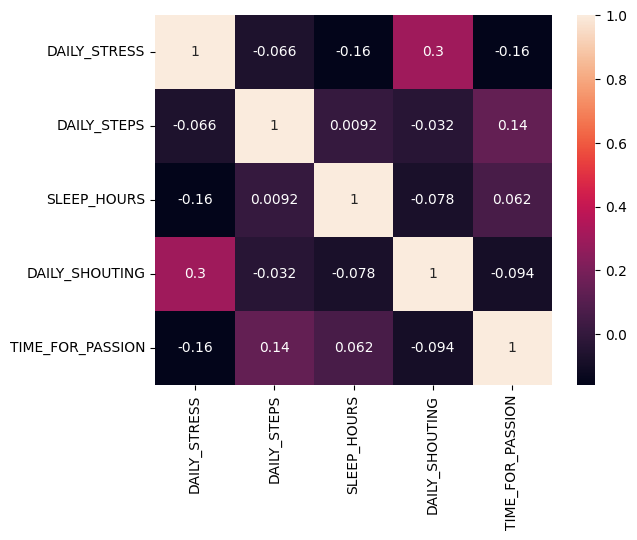

In [25]:
#Trying to find useful correlations

Selected_Columns = df[["DAILY_STRESS", "DAILY_STEPS", "SLEEP_HOURS", "DAILY_SHOUTING", "TIME_FOR_PASSION"]]
sns.heatmap(Selected_Columns.corr(), annot=True)
plt.show()

This was much easier to do than outliers! I enjoyed checking for different columns, however these are the most important ones for my case study.

I notice there is a strong correlation between time for passion and daily steps and stress levels. So I can use this insight as a feature to make sure the user is reminded to make more time for passion or ME TIME! and also be more active or make time for fitness.

I enjoyed doing this assignment. Some challenges I faced were more technical for example, writing a longer piece of code, or thinking which code to use, I still have problems understading how and when to change strings to floats and vice versa and making decisions on which data to select, which data to change and so forth. I still struggle with the 'Data Cleaning Part' and also the "Statistics Part", I am aiming to use my time during autumn-break to enhance my understanding and skills on this. I tried my best to relate the dataset provided with my case study however I do feel more couldve been done and I am looking for feedback to address my struggles.To sum it all up, I used only pieces of code that I thought were useful for getting some insights for my app design.